## 🏢 Business Scenario  
A car dealership wants to **predict the resale price of used cars**.  
They believe that the **age of the car, mileage driven, engine size, and horsepower** play a big role in determining the resale value.  

📌 **Goal** → Build an MLR model to predict **Price** based on these features.  


# 🚗 Car Resale Price Prediction using Multiple Linear Regression  

## 📌 Business Problem  
Car resale value depends on many factors such as **Car Age**, **Mileage**, **Engine Size**, and **Horsepower**.  
We want to build a **Multiple Linear Regression (MLR)** model to predict the **Resale Price of a Car** based on these factors.  

---

## 📊 Dataset Description  
Our dataset contains the following features:  

- **Car_Age (years)** → Older cars usually sell for less.  
- **Mileage_km** → Higher mileage reduces the resale price.  
- **Engine_Size (cc)** → Bigger engines often add value.  
- **Horsepower (HP)** → More horsepower = better performance = higher value.  
- **Price (₹)** → Target variable (Car Resale Price).  

---



##  Step 1: Importing the Data

In [14]:
# 🔹 Import libraries
import pandas as pd

# 🔹 Create Dataset
data = {
    "Car_Age": [5, 3, 8, 10, 2, 7, 12, 6, 4, 9,
                11, 1, 13, 14, 5, 8, 7, 3, 6, 4,
                10, 9, 2, 12, 13, 5, 8, 7, 11, 4],
    "Mileage_km": [50000, 30000, 90000, 120000, 20000, 85000, 135000, 60000, 40000, 95000,
                   110000, 15000, 140000, 145000, 48000, 87000, 78000, 25000, 55000, 35000,
                   115000, 100000, 22000, 125000, 138000, 52000, 92000, 80000, 130000, 45000],
    "Engine_Size": [1500, 1800, 1200, 1600, 2000, 1300, 1100, 1700, 1900, 1400,
                    1000, 2200, 900, 800, 1600, 1500, 1800, 2000, 1750, 1650,
                    1250, 1450, 2100, 950, 850, 1550, 1350, 1850, 1050, 1950],
    "Horsepower": [100, 120, 90, 110, 150, 95, 80, 130, 140, 85,
                   75, 160, 70, 65, 115, 100, 125, 145, 135, 105,
                   88, 92, 155, 72, 68, 118, 98, 128, 78, 138],
    "Price": [450000, 620000, 300000, 250000, 700000, 320000, 180000, 400000, 500000, 280000,
              200000, 800000, 150000, 120000, 470000, 310000, 350000, 650000, 430000, 520000,
              240000, 270000, 730000, 170000, 140000, 460000, 330000, 380000, 190000, 490000]
}

In [15]:
df = pd.DataFrame(data)

In [16]:
# 🔹 Show first 5 rows
df.head()

,Car_Age,Mileage_km,Engine_Size,Horsepower,Price
0,5,50000,1500,100,450000
1,3,30000,1800,120,620000
2,8,90000,1200,90,300000
3,10,120000,1600,110,250000
4,2,20000,2000,150,700000


## ✅ Step 2: Quick Data Check (Sanity & Shape)

- Rows & columns  
- Missing values  
- Basic stats (are the numbers in a sensible range?)


In [17]:
# Shape, nulls, and quick stats
df.shape, df.isna().sum()

((30, 5),
 Car_Age        0
 Mileage_km     0
 Engine_Size    0
 Horsepower     0
 Price          0
 dtype: int64)

In [18]:
df.describe(include='all').T

,count,mean,std,min,25%,50%,75%,max
Car_Age,30.0,7.300000,3.659188,1.0,4.25,7.0,10.0,14.0
Mileage_km,30.0,78733.333333,40962.500373,15000.0,45750.00,82500.0,113750.0,145000.0
Engine_Size,30.0,1501.666667,397.293285,800.0,1212.50,1525.0,1800.0,2200.0
Horsepower,30.0,107.666667,28.188202,65.0,85.75,102.5,129.5,160.0
Price,30.0,380000.000000,186418.143264,120000.0,242500.00,340000.0,485000.0,800000.0


## 🧠 Step 3: Model Building (Equation & Coefficients)

We’ll fit a Multiple Linear Regression with:
**Price ~ Car_Age + Mileage_km + Engine_Size + Horsepower**

- Get coefficients (β’s)  
- Write the model equation  
- See R² and Adjusted R²


In [19]:
import statsmodels.api as sm

X = df[['Car_Age','Mileage_km','Engine_Size','Horsepower']]
y = df['Price']

# add intercept
X_const = sm.add_constant(X)

model = sm.OLS(y, X_const).fit()
model.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.947
Model:                            OLS   Adj. R-squared:                  0.938
Method:                 Least Squares   F-statistic:                     111.2
Date:                Sun, 24 Aug 2025   Prob (F-statistic):           1.53e-15
Time:                        19:20:54   Log-Likelihood:                -362.14
No. Observations:                  30   AIC:                             734.3
Df Residuals:                      25   BIC:                             741.3
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const        6.202e+05   1.31e+05      4.718      0.000    3.49e+05    8.91e+05
Car_Age     -3.386e+04   1.97e+04     -1.717      0.098   -7.45e+04    6756.981
Mileage_km     -0.9486      1.559     -0.608      0.548      -4.160       2.263
Engine_Size   -98.6942    105.132     -0.939      0.357    -315.217     117.829
Horsepower   2135.2624   1317.639      1.621      0.118    -578.467    4848.992
==============================================================================
Omnibus:                        0.905   Durbin-Watson:                   2.084
Prob(Omnibus):                  0.636   Jarque-Bera (JB):                0.909
Skew:                           0.359   Prob(JB):                        0.635
Kurtosis:                       2.539   Cond. No.                     1.38e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.38e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

## ✍️ Step 3.1: Write the Learned Equation (Human-Readable)

Format the learned model as:
**Price = β₀ + β₁·Car_Age + β₂·Mileage_km + β₃·Engine_Size + β₄·Horsepower**


In [20]:
b0 = model.params['const']
b1 = model.params['Car_Age']
b2 = model.params['Mileage_km']
b3 = model.params['Engine_Size']
b4 = model.params['Horsepower']

print(f"Price = {b0:,.2f} "
      f"+ ({b1:,.2f})·Car_Age "
      f"+ ({b2:,.4f})·Mileage_km "
      f"+ ({b3:,.2f})·Engine_Size "
      f"+ ({b4:,.2f})·Horsepower")
print("\nR²:", round(model.rsquared, 4),
      "| Adjusted R²:", round(model.rsquared_adj, 4))


Price = 620,157.68 + (-33,857.71)·Car_Age + (-0.9486)·Mileage_km + (-98.69)·Engine_Size + (2,135.26)·Horsepower

R²: 0.9468 | Adjusted R²: 0.9382


## 🔎 Step 4: Predictions & Residuals

- `y_pred` = model predictions  
- `residuals` = actual − predicted  
- Quick check: small residuals = better fit


In [21]:
df['Predicted_Price'] = model.predict(X_const)
df['Residual'] = df['Price'] - df['Predicted_Price']
df[['Price','Predicted_Price','Residual']].head(10)


,Price,Predicted_Price,Residual
0,450000,468923.620887,-18923.620887
1,620000,568708.252628,51291.747372
2,300000,337661.690455,-37661.690455
3,250000,244715.539465,5284.460535
4,700000,656371.109506,43628.890494
5,320000,377069.347710,-57069.347710
6,180000,148060.168494,31939.831506
7,400000,469898.848315,-69898.848315
8,500000,558200.271167,-58200.271167
9,280000,268645.786738,11354.213262


## 📈 Step 5: Simple Residual Plots (Visual Check)

- Residuals should be randomly scattered around 0  
- No strong pattern/funnel shape


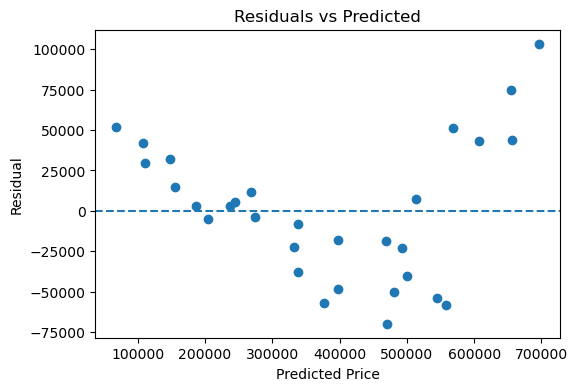

In [22]:
import matplotlib.pyplot as plt

plt.figure(figsize=(6,4))
plt.scatter(df['Predicted_Price'], df['Residual'])
plt.axhline(0, linestyle='--')
plt.title("Residuals vs Predicted")
plt.xlabel("Predicted Price")
plt.ylabel("Residual")
plt.show()


## Conclusion

We built a Multiple Linear Regression (MLR) model to predict car prices using:
- Car Age
- Mileage
- Engine Size
- Horsepower

### Final Equation:
Price = 620,157.68 – 33,857.71·Car_Age – 0.9486·Mileage – 98.69·Engine_Size + 2,135.26·Horsepower  

### Model Performance:
- R² = 0.9468 → Model explains about **95% of variation** in car prices.  
- Adjusted R² = 0.9382 → Model is still strong after adjusting for predictors.  

### Residuals:
- Residuals are spread around zero.  
- No clear pattern → Model is reliable.  

✅ **Overall:**  
The model gives good predictions of car prices and shows that car age, mileage, engine size, and horsepower all affect the price.
